In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K


In [117]:
from keras.datasets import mnist

In [118]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [119]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [120]:
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


[50098 45580 34977   413 45859 19773 58580 33986 16744 57584 53398 40673
 36106  9221  5137  3944 43888 12914  5602 37304 28201 44340 59212  9976
 37482]


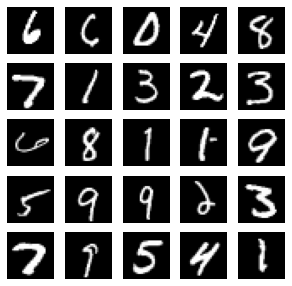

In [121]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
print(indexes)
#print((x_train[0]))
images = x_train[indexes]
labels = y_train[indexes]
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()

In [122]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Conv2D, Flatten

In [123]:
num_labels = len(np.unique(y_train))


In [124]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [125]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [126]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [137]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))


In [138]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_24 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_25 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)              

In [139]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)



Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4238 - accuracy: 0.8691
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1920 - accuracy: 0.9427
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1507 - accuracy: 0.9553
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1295 - accuracy: 0.9604
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1104 - accuracy: 0.9668
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1022 - accuracy: 0.9688
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0940 - accuracy: 0.9703
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0867 - accuracy: 0.9736
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0836 - accuracy: 0.9735
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0789 - accuracy: 0.9755